In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
import keras
from keras import backend as K
import h5py


sess = tf.Session()
K.set_session(sess)
plt.ion()

/home/diogo/.virtualenvs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
db_image_path = '../generate/datatest.hdf5'

with h5py.File(db_image_path, 'r') as datadb:
    X = datadb['X'].value
    Y = datadb['Y'].value

    idxs = datadb['train']
    Xtrain = X[idxs]
    Ytrain = Y[idxs]

    idxs = datadb['test']
    Xtest = X[idxs]
    Ytest = Y[idxs]



In [3]:
_B, _H, _W, _C = Xtrain.shape
Xtrain.shape

(250, 50, 200, 3)

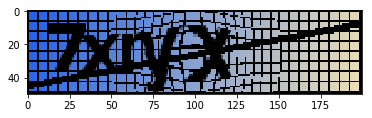

In [4]:
plt.imshow(Xtrain[0])

In [5]:
out_put_shape = Ytrain.shape[-1]
print(Ytrain.shape)
print(Ytrain[0])

(250, 5, 36)
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [15]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input
from keras.losses import categorical_crossentropy 
from keras.layers import Activation
from keras.engine.topology import Input



Xin = tf.placeholder(tf.float32, [None, _H, _W, _C],name='X')
Yin = tf.placeholder(tf.float32, [None, 5, 36], name='Y')

KXin = Input(tensor=Xin)
KYin = Input(tensor=Yin)
    
x = Flatten()(KXin)
Ylogits = Dense(out_put_shape, activation=None)(x)
Ypred = Activation('softmax')(Ylogits)


#out = [Dense(out_put_shape, activation='softmax')(x) for _ in range(5)]


def loss(ytrue, ypred):
    xent = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=ytrue[:, 0, :])
    return xent
    
    #lossi = [categorical_crossentropy(Yi[:, i, :], out[i]) for i in range(5)]
    #loss = sum(lossi)

model = Model(inputs=[KXin, KYin], outputs=Ypred)


# Compile model
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

ValueError: Index out of range using input dim 2; input has only 2 dims for 'loss_3/activation_8_loss/strided_slice' (op: 'StridedSlice') with input shapes: [?,?], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.

In [13]:
h = model.fit(Xtrain, Ytrain, epochs=20, batch_size=10,  verbose=2)

ValueError: ('Error when checking model input: expected no data, but got:', array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.1254902 , 0.38039216, 0.9137255 ],
         [0.12941177, 0.38431373, 0.9137255 ],
         ...,
         [0.88235295, 0.84313726, 0.72156864],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.1254902 , 0.38039216, 0.9137255 ],
         [0.13333334, 0.38431373, 0.9137255 ],
         ...,
         [0.88235295, 0.84313726, 0.72156864],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.17254902, 0.40784314, 0.9019608 ],
         [0.1764706 , 0.4117647 , 0.9019608 ],
         ...,
         [0.9254902 , 0.87058824, 0.7137255 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.6509804 , 0.99607843, 0.9137255 ],
         [0.6509804 , 0.99607843, 0.9098039 ],
         ...,
         [0.8784314 , 0.8980392 , 0.2784314 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.6509804 , 0.99607843, 0.9137255 ],
         [0.6509804 , 0.99607843, 0.90588236],
         ...,
         [0.8784314 , 0.8980392 , 0.2784314 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.6627451 , 0.99215686, 0.8745098 ],
         [0.6627451 , 0.99215686, 0.8745098 ],
         ...,
         [0.8901961 , 0.8901961 , 0.24313726],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.7372549 , 0.34509805, 0.78039217],
         [0.7372549 , 0.34509805, 0.78039217],
         ...,
         [0.9764706 , 0.7490196 , 0.6666667 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.7372549 , 0.34509805, 0.78039217],
         [0.7372549 , 0.34901962, 0.78039217],
         ...,
         [0.9764706 , 0.7490196 , 0.6666667 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.7490196 , 0.36862746, 0.7764706 ],
         [0.7529412 , 0.37254903, 0.7764706 ],
         ...,
         [0.9882353 , 0.77254903, 0.65882355],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       ...,


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.9137255 , 0.95686275, 0.78039217],
         [0.9098039 , 0.95686275, 0.78039217],
         ...,
         [0.11372549, 0.6392157 , 0.654902  ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.9137255 , 0.95686275, 0.78039217],
         [0.90588236, 0.9529412 , 0.78039217],
         ...,
         [0.11372549, 0.6392157 , 0.654902  ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.8666667 , 0.9372549 , 0.77254903],
         [0.8627451 , 0.9372549 , 0.77254903],
         ...,
         [0.06666667, 0.61960787, 0.64705884],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.39215687, 0.7137255 , 0.6156863 ],
         [0.39215687, 0.7137255 , 0.6156863 ],
         ...,
         [0.34901962, 0.31764707, 0.827451  ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.39215687, 0.7137255 , 0.6156863 ],
         [0.39215687, 0.70980394, 0.6156863 ],
         ...,
         [0.34901962, 0.31764707, 0.827451  ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.39215687, 0.6901961 , 0.627451  ],
         [0.39215687, 0.6901961 , 0.627451  ],
         ...,
         [0.34901962, 0.29411766, 0.8392157 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.31764707, 0.74509805, 0.09803922],
         [0.31764707, 0.7411765 , 0.10196079],
         ...,
         [0.50980395, 0.12156863, 0.9137255 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.31764707, 0.74509805, 0.09803922],
         [0.31764707, 0.7372549 , 0.10588235],
         ...,
         [0.50980395, 0.12156863, 0.9137255 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.32941177, 0.7058824 , 0.14901961],
         [0.32941177, 0.7058824 , 0.15294118],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]]], dtype=float32))

SyntaxError: invalid syntax (<ipython-input-9-ffb7db7554f1>, line 1)